# Sentiment Analysis
## EDA
---

This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the Twitter API.

The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .It contains the following 6 fields:

1. **target**: the polarity of the tweet (*0* = negative, *4* = positive)
2. **ids**: The id of the tweet ( *2087*)
3. **date**: the date of the tweet (*Sat May 16 23:58:44 UTC 2009*)
4. **flag**: The query (*lyx*). If there is no query, then this value is NO_QUERY.
5. **user**: the user that tweeted (*robotickilldozr*)
6. **text**: the text of the tweet (*Lyx is cool*)

SOURCE https://www.kaggle.com/kazanova/sentiment140

---

**Other such dataset is the IMDB dataset**

https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format?select=Train.csv


**Pre trained model (Transformers model)**

https://pypi.org/project/transformers/

Transformers provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation and more in over 100 languages. Its aim is to make cutting-edge NLP easier to use for everyone.


**Reference study**

https://www.kaggle.com/isanbel/depression-on-twitter

https://www.kaggle.com/mayank954/twitter-sentiment-analysis-naive-bayes


Here Machine learning models such as RandomForestClassifier and XGBClassifier are used.

The reason I am using Neural Network is that the trained model can be exported to a .h5 or .json file and used in other environments without retraining the model.

Also, a simple Neural Network can be more accurate than other methods stated above.

Accuracy of XGBClassifier was 70% and for RandomForestClassifier it was 60%.

Methods such as KNN or SVM or Naive Bayes can not be used as computation will increase substancially.


**More information on Sentiment Analysis**

https://callminer.com/blog/sentiment-analysis-examples-best-practices

The above link provides information on overall working of sentiment analysis, Use cases, and challanges in sentiment analysis


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./DATA/DATA.csv", header=None)

In [3]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
data.shape

(1600000, 6)

**for training and implimenting the model we only need the tweet text and its lable**

for this reason other columns can be dropped

In [6]:
data = data.drop(columns=[1,2,3,4])

In [7]:
data = data.rename(columns={0: "label", 5: "tweet"})
data

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
# Check for null values
(data.isnull().sum() / len(data))*100

label    0.0
tweet    0.0
dtype: float64

**As seen above, there are no Null Values in the dataset**

In [9]:
# checking lables
data.label.unique()

array([0, 4])

In [10]:
# 0 -> Negative
# 4 -> Positive
neg = len(data[data.label == 0 ])
pos = len(data[data.label == 4 ])

In [11]:
print(f"{neg} Negative records")
print(f"{pos} Positive records")

800000 Negative records
800000 Positive records


<AxesSubplot:>

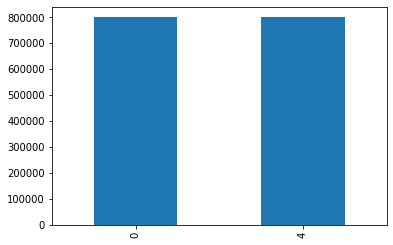

In [12]:
data['label'].value_counts().plot(kind='bar')

**There are equal records for both positive and negative tweets**

**The data containd 800000 Negative(0) records and 800000(4) Positive records, hence the data is balanced. There are no null values in the data**

---

In [15]:
from wordcloud import WordCloud

A word cloud is a novelty visual representation of text data,

typically used to depict keyword metadata on websites, or to visualize free form text.

Tags are usually single words, and the **importance of each tag is shown with font size or color**

### Word Cloud of negative tweets

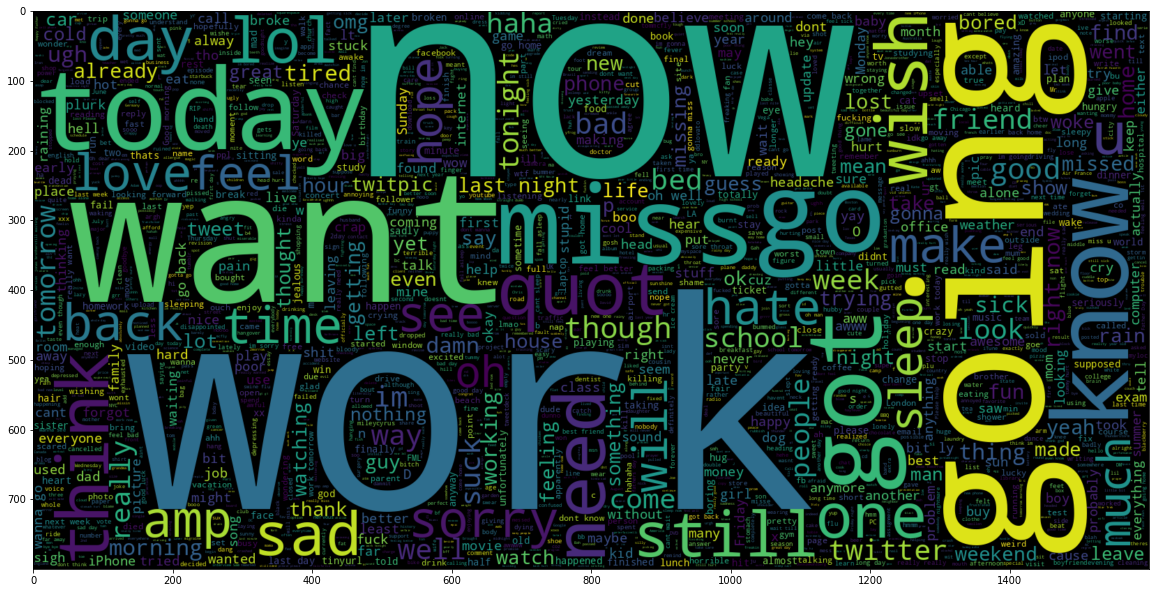

In [17]:
plt.figure(figsize = (20,20)) 
cloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label == 0].tweet))
plt.imshow(cloud , interpolation = 'bilinear')

### Word Cloud of Positive tweets

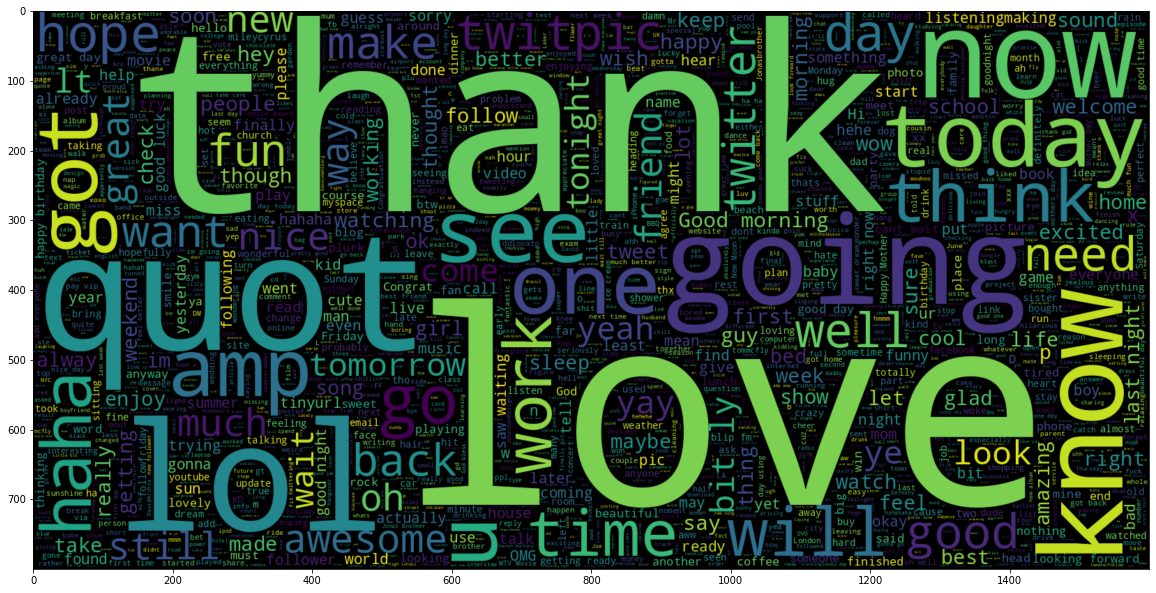

In [19]:
plt.figure(figsize = (20,20)) 
cloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label == 4].tweet))
plt.imshow(cloud , interpolation = 'bilinear')